<Figure size 640x480 with 0 Axes>

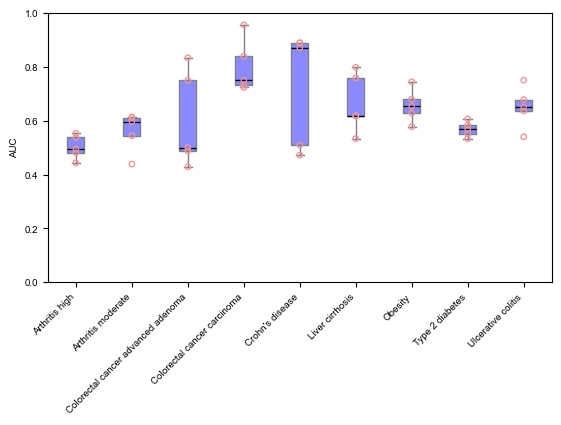

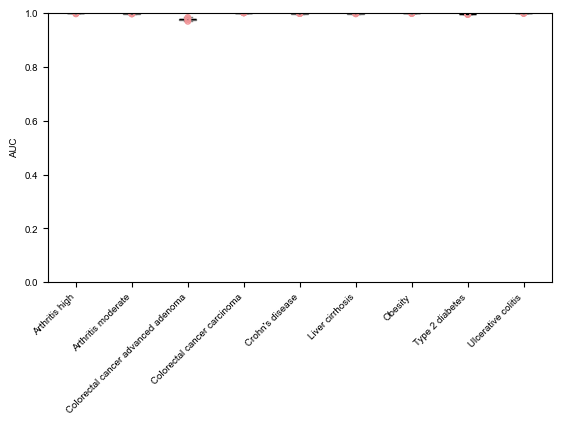

In [1]:
# 绘图
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

plt.figure()
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
Disease_list=['Arthritis_High_Genus_Abundance','Arthritis_Moderate_Genus_Abundance','ColorectalCancer_AdvancedAdenoma_Genus_Abundance','ColorectalCancer_Carcinoma_Genus_Abundance','CrohnsDisease_Genus_Abundance','LiverCirrhosis_Genus_Abundance','Obesity_Genus_Abundance','Type2Diabetes_Genus_Abundance','UlcerativeColitis_Genus_Abundance']
control_list=['Arthritis_None_Genus_Abundance','Arthritis_None_Genus_Abundance','ColorectalCancer_Controls_Genus_Abundance','ColorectalCancer_Controls_Genus_Abundance','CrohnsDisease_None_Genus_Abundance','LiverCirrhosis_None_Genus_Abundance','Obesity_None_Genus_Abundance','Type2Diabetes_None_Genus_Abundance','UlcerativeColitis_None_Genus_Abundance']
Disease_list2=['Arthritis high','Arthritis moderate','Colorectal cancer advanced adenoma','Colorectal cancer carcinoma','Crohn\'s disease','Liver cirrhosis','Obesity','Type 2 diabetes','Ulcerative colitis']
color_list = [mcolors.to_hex(plt.cm.tab20(i)) for i in range(20)]
dir = 'optimum parameter in randomforest/'
file_list = ['(Test)','(Train)']
for k in range(len(file_list)):
    list1=[]
    fig=plt.figure(figsize=(6.5,3.5))
    for i in range(len(Disease_list)):
        df=pd.read_csv(dir+file_list[k]+' optimum parameter of '+Disease_list[i]+' in random forest(5_genus).csv',index_col=0)
        roc_auc = df.mean(axis=1)
        max_index_index_roc_auc = roc_auc.idxmax()
        values = max(roc_auc) 
        error_bar = df.loc[max_index_index_roc_auc].std()
        section=df.loc[max_index_index_roc_auc].values.tolist()
        dict_merged=[Disease_list[i], values, error_bar, section]
        list1.append(dict_merged)
    # Use zip and * unpacking operations
    Disease_list_new1,values_list1, error_bar_list1 ,section_list1= zip(*list1)
    Disease_list2_new1 = [Disease_list2[Disease_list.index(disease)] for disease in Disease_list_new1]   
    # Export data to an Excel file
    data = [np.array(section) for section in section_list1]
    positions = np.arange(len(Disease_list_new1))

    #data Export to an Excel file
    df_data = pd.DataFrame({'Disease':Disease_list2_new1,
                           '5 bimodal genera AUC values':data})
    df_data.to_excel('fig/'+file_list[k]+' AUC of roc curve of random forest in difference disease (5_genera).xlsx',index=False)

    plt.boxplot(data, positions=positions, widths=0.3, patch_artist=True, boxprops=dict(facecolor='#8A8AFF',edgecolor='gray'),showfliers=False,medianprops= dict(color='black'),whiskerprops=dict(color='gray'),capprops=dict(color='gray'),zorder=1 )
    def plot_all_points(data, positions, facecolor='none',edgecolor='#F19598', alpha=1.0, size=15, jitter=0.0):
        for i, pos in enumerate(positions):
            y = data[i]
            x = np.random.normal(pos, jitter, size=len(y))  
            plt.scatter(x, y, facecolor=facecolor,edgecolor=edgecolor, alpha=alpha, s=size, zorder=2)
    plot_all_points(data, positions)
    plt.ylabel('AUC',fontsize=7)
    plt.xticks(np.arange(len(Disease_list_new1)), Disease_list2_new1, fontsize=7)
    plt.xticks(rotation=45, fontsize=7, ha='right')  # Rotate x-axis labels
    plt.yticks(fontsize=7)
    plt.ylim(0.0,1.0)
    plt.savefig('fig/'+file_list[k]+' AUC of roc curve of random forest in difference disease (5_genera).pdf',bbox_inches='tight')
    